In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [5]:
machine = pd.read_csv('Equipment data from keggel/PdM_machines.csv')
maintenance = pd.read_csv('Equipment data from keggel/PdM_maint.csv')
telemetry = pd.read_csv('Equipment data from keggel/PdM_telemetry.csv')
failures = pd.read_csv('Equipment data from keggel/PdM_failures.csv')
errors = pd.read_csv('Equipment data from keggel/PdM_errors.csv')



In [6]:
maintenance['datetimetime'] = pd.to_datetime(maintenance['datetime'])
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])
errors['datetime'] = pd.to_datetime(errors['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])

In [29]:
telemetry_merge = pd.merge(telemetry, machine, on='machineID', how='left')
telemetry_mean = telemetry.groupby('machineID').mean().reset_index()
maintenance_merged = pd.merge(maintenance, machine, on='machineID', how='left')


merged_data = pd.merge(machine, telemetry_mean, on='machineID', how='left')
maintenance_count = maintenance.groupby('machineID').size().reset_index(name='maintenance_count')

Visualization of Machines maintanace 

C:\Users\natha\AppData\Local\Temp\ipykernel_18132\1512516800.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  machine_maintenance['datetime'] = pd.to_datetime(machine_maintenance['datetime'])


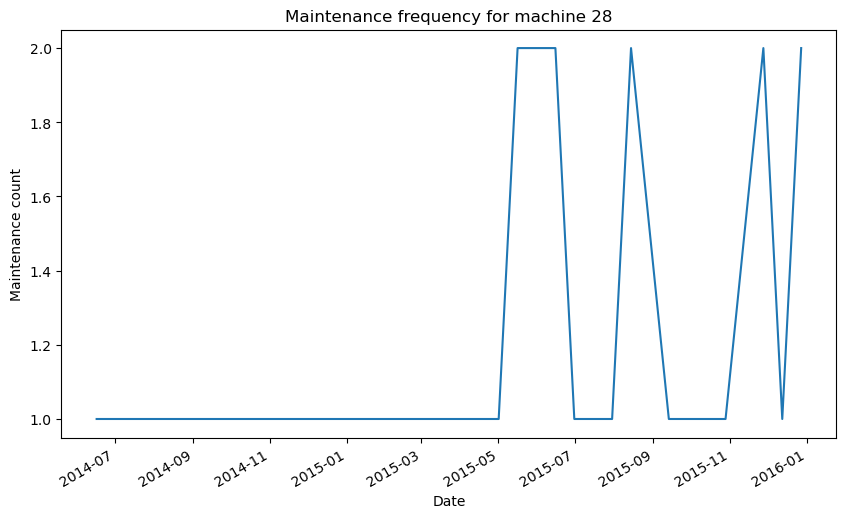

In [20]:
machine_id = 28  # replace with your machine ID
machine_maintenance = maintenance[maintenance['machineID'] == machine_id]


machine_maintenance['datetime'] = pd.to_datetime(machine_maintenance['datetime'])
maintenance_counts = machine_maintenance['datetime'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
maintenance_counts.plot(kind='line')
plt.title(f'Maintenance frequency for machine {machine_id}')
plt.xlabel('Date')
plt.ylabel('Maintenance count')
plt.show()

Visualization of Errors on each machines And Which error happens the most

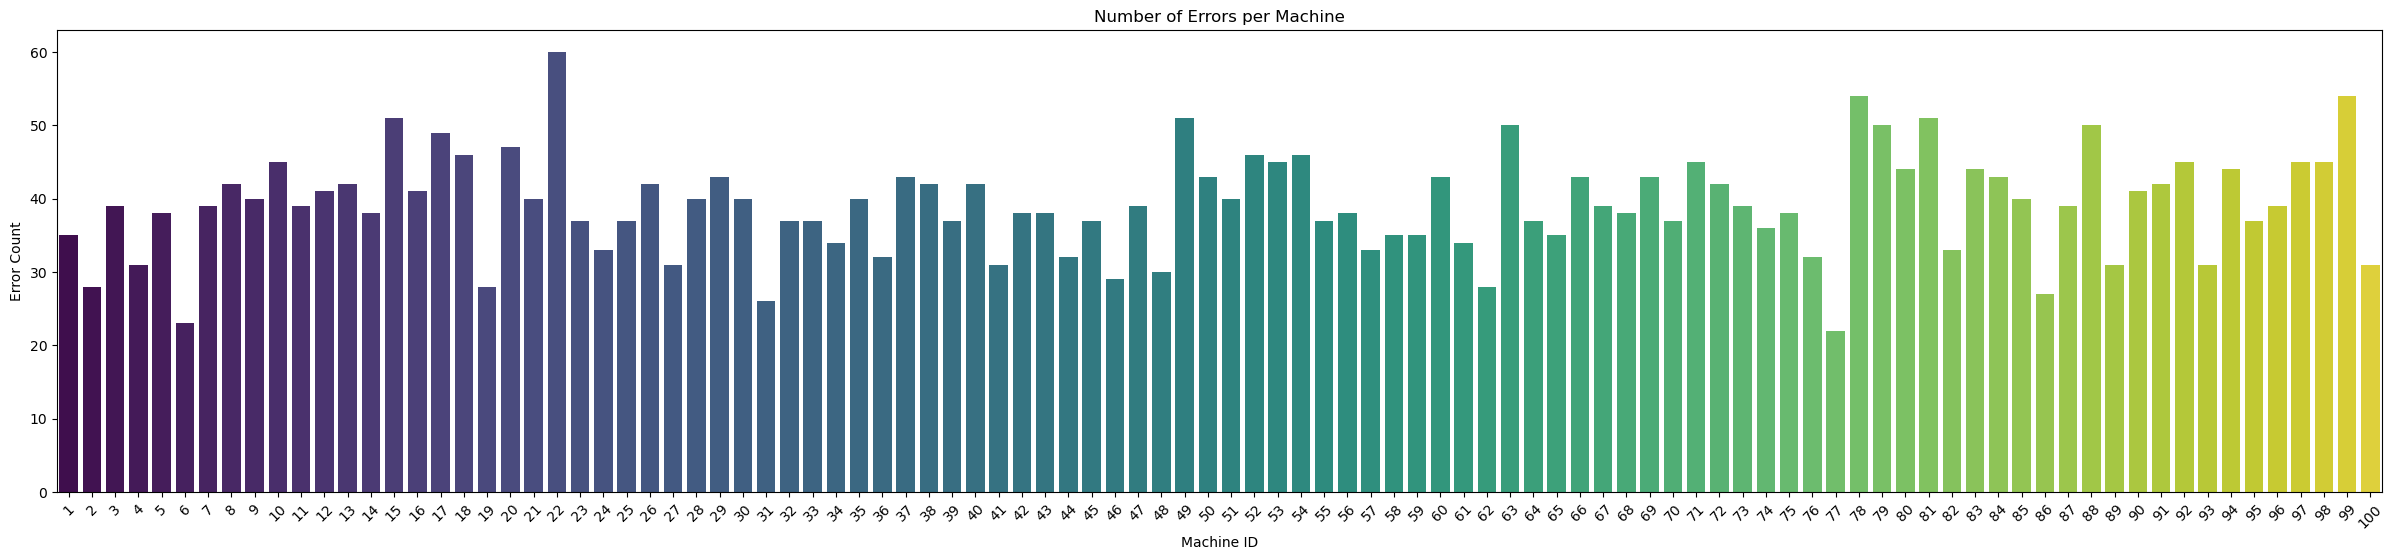

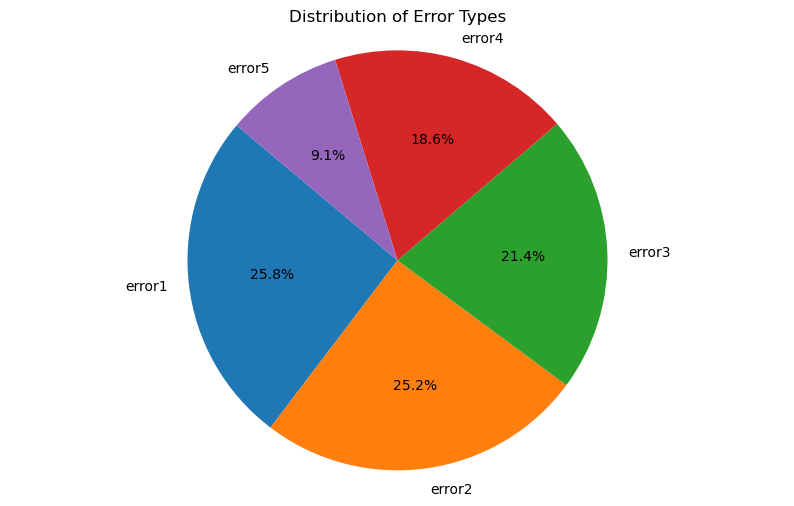

In [19]:


# Count the number of errors per machine
error_counts = errors['machineID'].value_counts().reset_index()
error_counts.columns = ['machineID', 'error_count']

# Plotting
plt.figure(figsize=(30, 6))
sns.barplot(x='machineID', y='error_count', data=error_counts, palette='viridis')
plt.title('Number of Errors per Machine')
plt.xlabel('Machine ID')
plt.ylabel('Error Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for the distribution of error types
plt.figure(figsize=(10, 6))
error_type_counts = errors['errorID'].value_counts()
plt.pie(error_type_counts, labels=error_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Error Types')
plt.axis('equal')
plt.show()


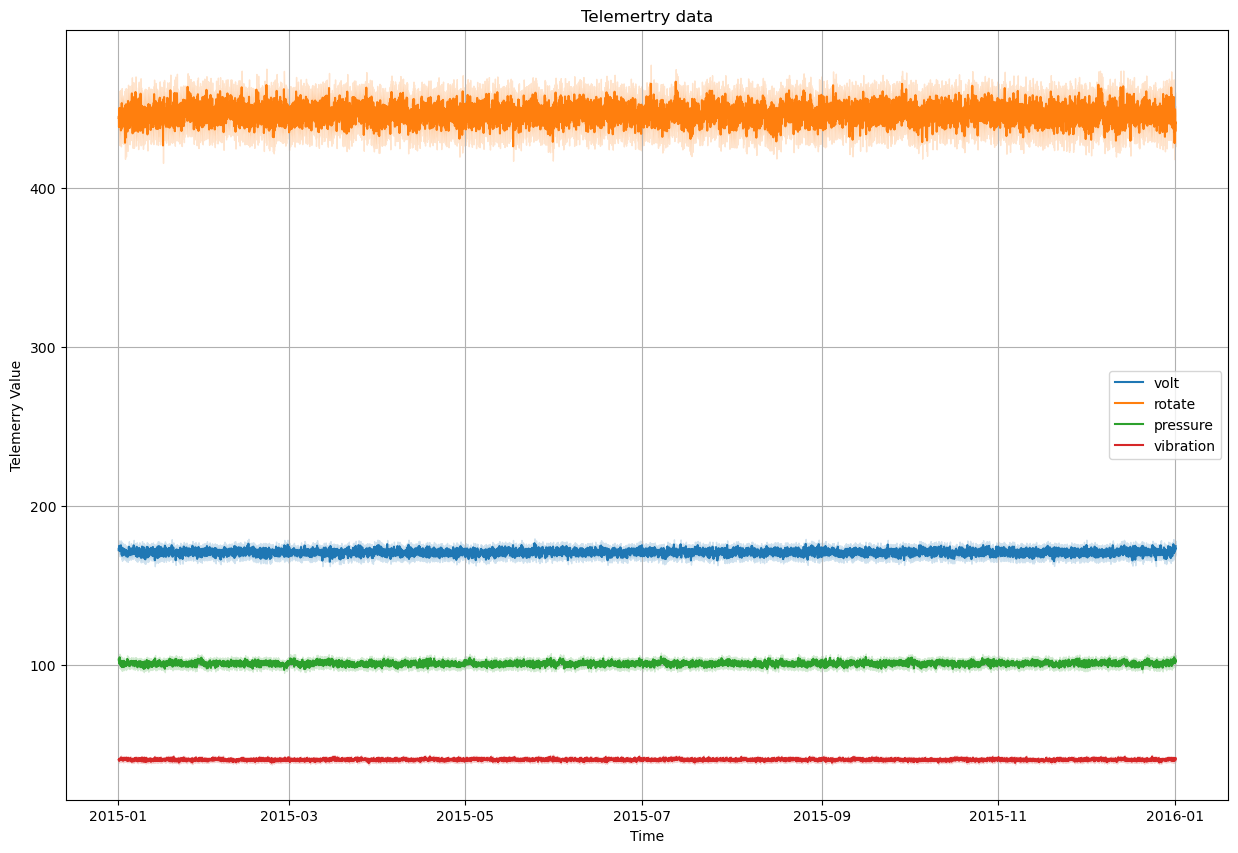

In [26]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])

# Plot telemetry data 
plt.figure(figsize=(15,10))
sns.lineplot(x='datetime', y='volt', data=telemetry ,label='volt')
sns.lineplot(x='datetime', y='rotate', data=telemetry ,label='rotate')
sns.lineplot(x='datetime', y='pressure', data=telemetry ,label='pressure')
sns.lineplot(x='datetime', y='vibration', data=telemetry ,label='vibration')

plt.title('Telemertry data')
plt.xlabel('Time')
plt.ylabel('Telemerry Value')
plt.legend()
plt.grid(True)
plt.show()

Merged table for distrubution chart

In [41]:
print("Merged Telemetry Data Table:")
print(telemetry_merge.head())
plt.figure(figsize=(14, 8))

Merged Telemetry Data Table:
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration   model  age  
0  45.087686  model3   18  
1  43.413973  model3   18  
2  34.178847  model3   18  
3  41.122144  model3   18  
4  25.990511  model3   18  


<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

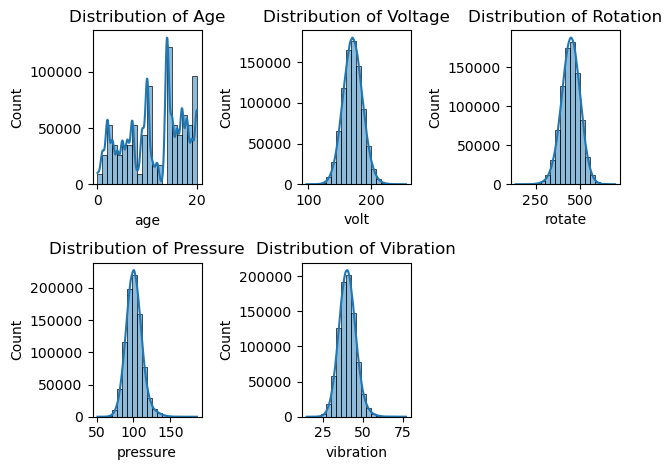

In [42]:
plt.subplot(2, 3, 1)
sns.histplot(telemetry_merge['age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(telemetry_merge['volt'], bins=20, kde=True)
plt.title('Distribution of Voltage')

plt.subplot(2, 3, 3)
sns.histplot(telemetry_merge['rotate'], bins=20, kde=True)
plt.title('Distribution of Rotation')

plt.subplot(2, 3, 4)
sns.histplot(telemetry_merge['pressure'], bins=20, kde=True)
plt.title('Distribution of Pressure')

plt.subplot(2, 3, 5)
sns.histplot(telemetry_merge['vibration'], bins=20, kde=True)
plt.title('Distribution of Vibration')

plt.tight_layout()
plt.show()

Find out frequency of Maintenance, Error by components and Failures by Machine Model

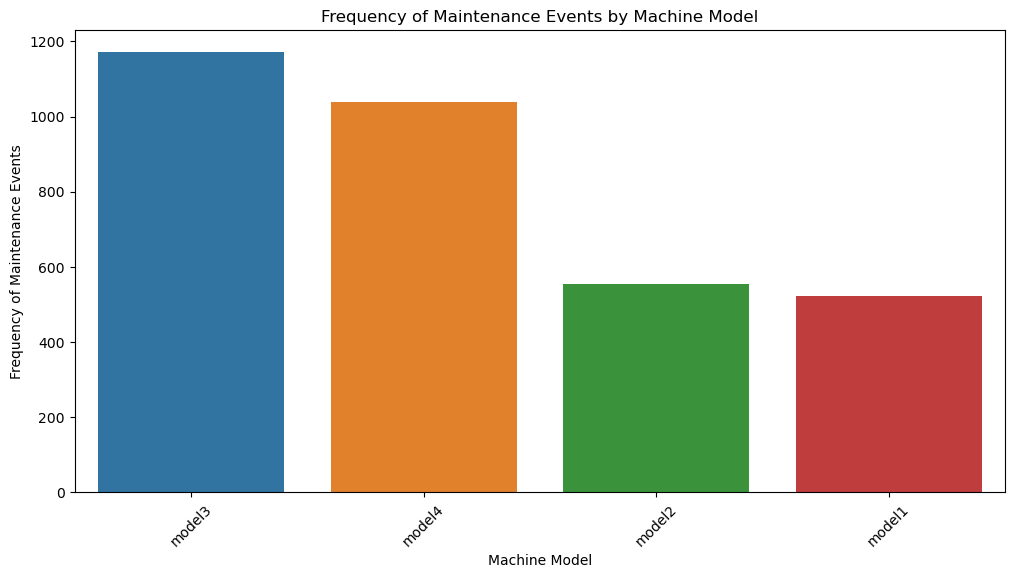

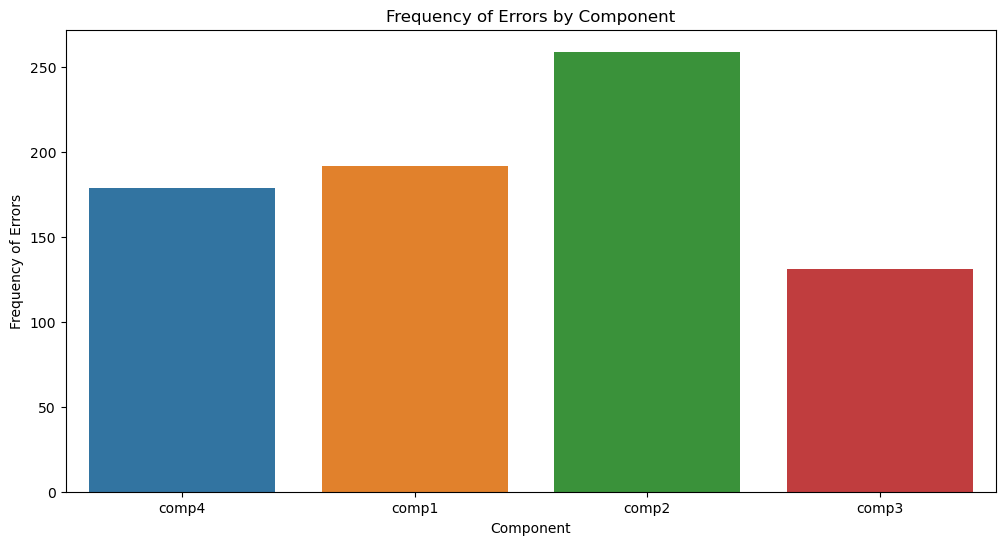

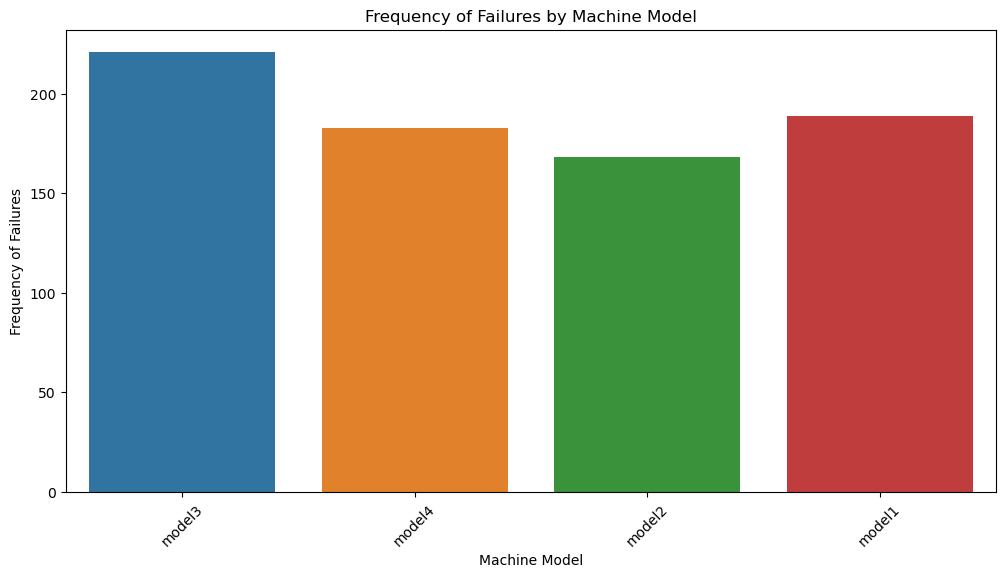

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x='model', data=maintenance_merged)
plt.title('Frequency of Maintenance Events by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Maintenance Events')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x='failure', data=failures)
plt.title('Frequency of Errors by Component')
plt.xlabel('Component')
plt.ylabel('Frequency of Errors')
plt.show()


plt.figure(figsize=(12, 6))
failures_merged = pd.merge(failures, machine, on='machineID', how='left')
sns.countplot(x='model', data=failures_merged)
plt.title('Frequency of Failures by Machine Model')
plt.xlabel('Machine Model')
plt.ylabel('Frequency of Failures')
plt.xticks(rotation=45)
plt.show()